## 策略评估指标

![title](./img/1.png)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline  

from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
df = pd.read_csv('test.csv',index_col = 0)
df.head()

,上证综指,中兴通讯,华天科技,中信证券
date,,,,
2016-06-01,2913.51,13.488,5.453,15.380
2016-06-02,2925.23,13.547,5.739,15.408
2016-06-03,2938.68,13.714,5.647,15.426
2016-06-06,2934.10,13.744,5.659,15.278
2016-06-07,2936.04,13.567,5.666,15.306


### 回测收益率

![title](./img/2.png)

In [3]:
df_new=df/df.iloc[0]

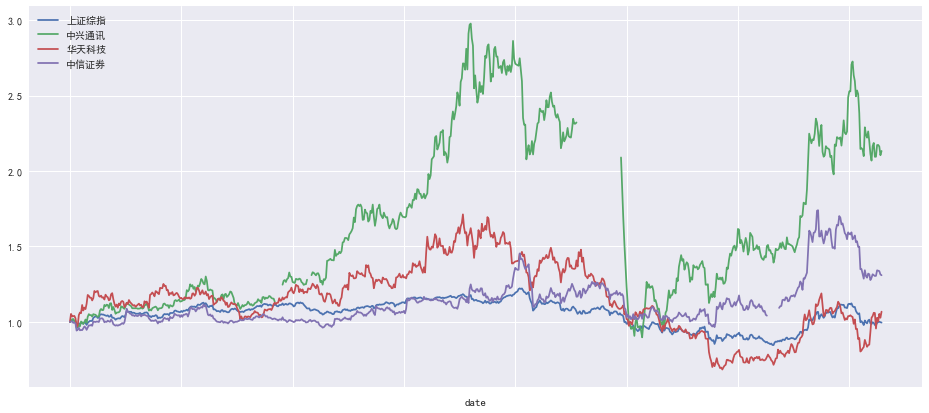

In [4]:
df_new.plot(figsize=(16,7))

In [5]:
### 区间累计收益率(绝对收益率)
total_ret=df_new.iloc[-1]-1
pd.DataFrame(total_ret.values,columns=['累计收益率'],index=total_ret.index)


,累计收益率
上证综指,-0.005083
中兴通讯,1.132266
华天科技,0.067302
中信证券,0.308843


## 回测年化收益


![title](./img/3.png)

In [6]:
len(df_new)

730

In [7]:
###年化收益率,假设一年以250交易日计算
annual_ret=pow(1+total_ret,250/len(df_new))-1
pd.DataFrame(annual_ret.values,columns=['年化收益率'],index=annual_ret.index)

,年化收益率
上证综指,-0.001744
中兴通讯,0.296035
华天科技,0.022557
中信证券,0.096554


## 最大回撤

![title](./img/4.png)

In [8]:
pd.Series([2, np.nan, 5, -1, 0])

0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [9]:
pd.Series([2, np.nan, 5, -1, 0]).cummax()

0    2.0
1    NaN
2    5.0
3    5.0
4    5.0
dtype: float64

In [10]:
df['上证综指'].cummax().head()

date
2016-06-01    2913.51
2016-06-02    2925.23
2016-06-03    2938.68
2016-06-06    2938.68
2016-06-07    2938.68
Name: 上证综指, dtype: float64

In [11]:
(df['上证综指'].cummax()-df['上证综指']).head()

date
2016-06-01    0.00
2016-06-02    0.00
2016-06-03    0.00
2016-06-06    4.58
2016-06-07    2.64
Name: 上证综指, dtype: float64

In [12]:
code='上证综指'
p_d=((df[code].cummax()-df[code])/df[code].cummax()).max()
#打印结果
print(f'pandas方法计算结果：{round(p_d*100,2)}%')     

pandas方法计算结果：30.77%


## 夏普比率

![title](./img/7.png)

In [17]:
##计算每日收益率
#收盘价缺失值（停牌），使用前值代替
rets=(df.fillna(method='pad')).apply(lambda x:x/x.shift(1)-1)[1:]
rets.head()

,上证综指,中兴通讯,华天科技,中信证券
date,,,,
2016-06-02,0.004023,0.004374,0.052448,0.001821
2016-06-03,0.004598,0.012327,-0.016031,0.001168
2016-06-06,-0.001559,0.002188,0.002125,-0.009594
2016-06-07,0.000661,-0.012878,0.001237,0.001833
2016-06-08,-0.003024,0.000737,-0.014825,-0.006076


In [19]:
#超额收益率以无风险收益率为基准
#假设无风险收益率为年化3%
#计算超额回报率
exReturn=rets-0.03/250
#计算夏普比率
sharperatio=np.sqrt(len(exReturn))*exReturn.mean()/exReturn.std()
#夏普比率的输出结果
SHR=pd.DataFrame(sharperatio,columns=['夏普比率'])
SHR

,夏普比率
上证综指,-0.199545
中兴通讯,1.236378
华天科技,0.309588
中信证券,0.609906


## 阿尔法（Alpha）与 贝塔（Beta）

- 阿尔法（Alpha）：非系统性风险，Alpha是投资者获得与市场波动无关的回报，一般用来度量投资者的投资技艺。
- 贝塔（Beta）：表示投资的系统性风险，反映了策略对大盘变化的敏感性。